<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [321]:
movies = pd.read_csv('./data/imdb_1000.csv')

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [6]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer:
movies['duration'].agg(['min','max'])

min     64
max    242
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

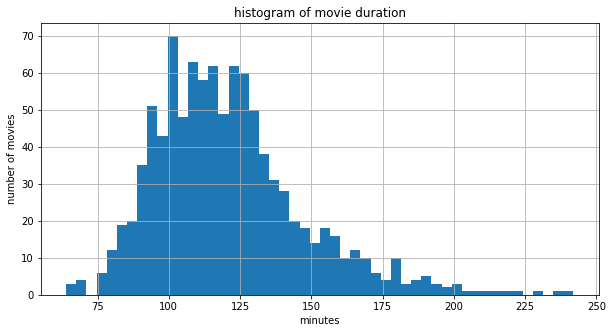

In [101]:
# Answer:
plt.figure(figsize=(10,5))
movies['duration'].hist(bins = 50)
plt.title('histogram of movie duration');
plt.xlabel('minutes');
plt.ylabel('number of movies');

#### Use a box plot to display that same data.

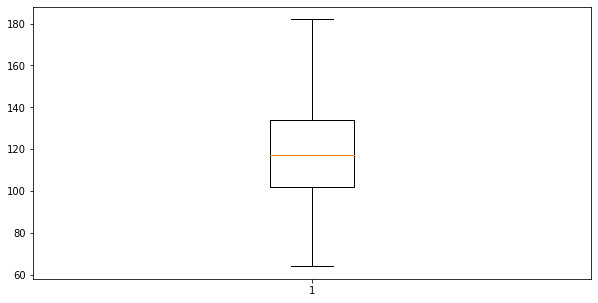

In [102]:
# Answer:
plt.figure(figsize=(10,5))
plt.boxplot(movies['duration'], showfliers=False);


## Intermediate level

#### Count how many movies have each of the content ratings.

In [76]:
# Answer:
movies['content_rating'].value_counts().reset_index()

,index,content_rating
0,R,460
1,PG-13,189
2,PG,123
3,NOT RATED,65
4,APPROVED,47
5,UNRATED,38
6,G,32
7,NC-17,7
8,PASSED,7
9,X,4


#### Use a visualization to display that same data, including a title and x and y labels.

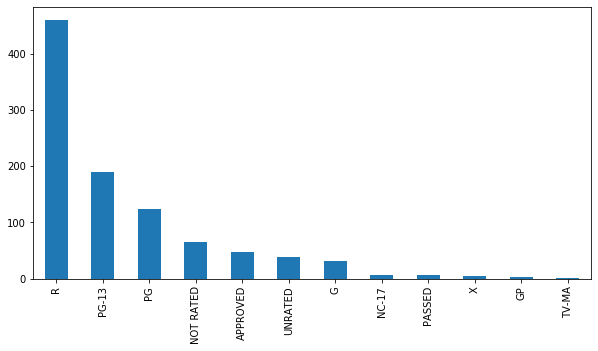

In [103]:
# Answer:
plt.figure(figsize=(10,5))
movies_new=movies['content_rating'].value_counts()

# for whatever reason bar works when you use a .plot method on the dataframe.
movies_new.plot.bar(x=movies_new[0], y=movies_new[1]);
# movies_new.plot.bar(x='index', y='content_rating');   -- same thing

# To recap HIST vs BOX vs BAR:
# HIST == movies['duration'].hist(bins = 50)
# BOX == plt.boxplot(movies['duration'], showfliers=False);
# BAR == movies_new=movies['content_rating'].value_counts().reset_index() 
#        movies_new.plot.bar(x='index', y='content_rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [112]:
# Answer:

def change_ratings(rating):
    unrated = ('NOT RATED', 'APPROVED', 'PASSED', 'GP')
    if rating in unrated:
        return 'UNRATED'
    else:
        return rating

movies['changed_ratings'] = movies['content_rating'].apply(change_ratings)
movies['changed_ratings'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: changed_ratings, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [113]:
# Answer:
def change_ratings(rating):
    unrated = ('X','TV-MA')
    if rating in unrated:
        return 'NC-17'
    else:
        return rating

movies['changed_ratings'] = movies['content_rating'].apply(change_ratings)
movies['changed_ratings'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: changed_ratings, dtype: int64

#### Count the number of missing values in each column.

In [120]:
# Answer:
movies.isnull().sum()

star_rating        0
title              0
content_rating     3
genre              0
duration           0
actors_list        0
changed_ratings    3
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [131]:
# Answer:
bool_series = pd.isnull(movies['content_rating'])
movies[bool_series]

,star_rating,title,content_rating,genre,duration,actors_list,changed_ratings,content_missing
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin...",NaN,True
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ...",NaN,True
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",NaN,True


In [154]:
movies.content_rating.fillna('PG-13', inplace=True)
movies[bool_series]

,star_rating,title,content_rating,genre,duration,actors_list,changed_ratings,content_missing
187,8.2,Butch Cassidy and the Sundance Kid,PG-13,Western,110,"[u'Paul Newman', u'Robert Redford', u'Katharin...",NaN,True
649,7.7,Where Eagles Dare,PG-13,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ...",NaN,True
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",NaN,True


In [156]:
movies.genre.loc[187] = 'Western'
movies.loc[187]
# Butch Cassidy and the Sundance Kid is not a biography! Had to ch

star_rating                                                      8.2
title                             Butch Cassidy and the Sundance Kid
content_rating                                                 PG-13
genre                                                        Western
duration                                                         110
actors_list        [u'Paul Newman', u'Robert Redford', u'Katharin...
changed_ratings                                                  NaN
content_missing                                                 True
Name: 187, dtype: object

In [382]:
# using loc
movies.loc[[187, 649, 936], :]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [164]:
# Answer:
print(movies.query("duration < 120")['star_rating'].mean())
print(movies.query("duration > 120")['star_rating'].mean())
greater_than2 = movies.query("duration < 120")['star_rating'].mean()
less_than2 = movies.query("duration > 120")['star_rating'].mean()
difference = greater_than2 - less_than2
print(difference)

7.838666666666657
7.953669724770622
-0.11500305810396494


#### Use a visualization to detect whether there is a relationship between duration and star rating.

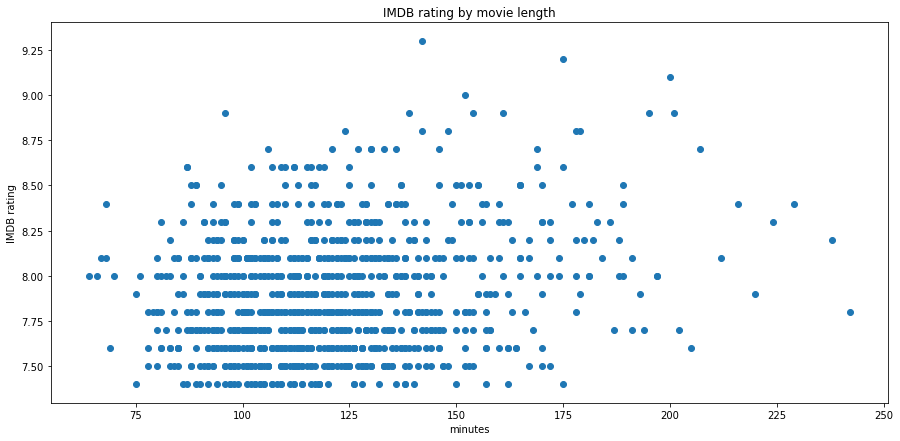

In [186]:
# Answer: scatter plot
plt.figure(figsize=(15,7))
plt.scatter(x=movies['duration'],y=movies['star_rating']);
plt.title('IMDB rating by movie length');
plt.xlabel('minutes');
plt.ylabel('IMDB rating');
plt.show()

#### Calculate the average duration for each genre.

In [181]:
# Answer:
movies.groupby('genre').mean()['duration'].sort_values()

genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    132.131579
Western      133.454545
Adventure    134.932432
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Spearmans correlation: 0.166
Pearsons correlation: 0.227
[[6.87384040e+02 2.00142711e+00]
 [2.00142711e+00 1.12942592e-01]]


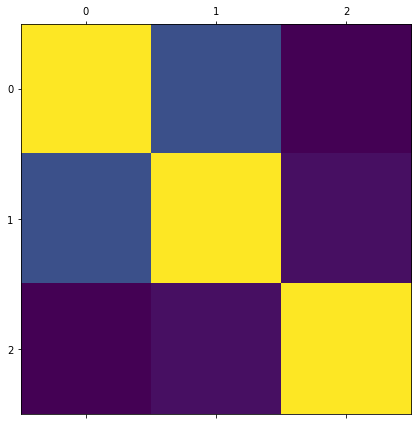

In [208]:
# Answer:
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Spearmans correlation
corr, _= spearmanr(movies['duration'], movies['star_rating'])
print('Spearmans correlation: %.3f' % corr)

# Pearsons correlation
corr, _= pearsonr(movies['duration'], movies['star_rating'])
print('Pearsons correlation: %.3f' % corr)

# covariance
covariance = cov(movies['duration'], movies['star_rating'])
print(covariance)

f = plt.figure(figsize=(15,7))
plt.matshow(movies.corr(), fignum=f.number)
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [283]:
# Answer:
movies.groupby(['genre','title']).max()['star_rating'].sort_values().tail(20).reset_index()

,genre,title,star_rating
0,Biography,Goodfellas,8.7
1,Adventure,Interstellar,8.7
2,Drama,It's a Wonderful Life,8.7
3,Drama,Seven Samurai,8.7
4,Crime,City of God,8.7
5,Adventure,The Lord of the Rings: The Fellowship of the Ring,8.8
6,Action,Inception,8.8
7,Action,Star Wars: Episode V - The Empire Strikes Back,8.8
8,Adventure,The Lord of the Rings: The Two Towers,8.8
9,Drama,Forrest Gump,8.8


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [560]:
movies['title'].value_counts()

Dracula                            2
The Girl with the Dragon Tattoo    2
Les Miserables                     2
True Grit                          2
Catch Me If You Can                1
                                  ..
The Goonies                        1
X-Men                              1
Begin Again                        1
Hotel Rwanda                       1
The Evil Dead                      1
Name: title, Length: 975, dtype: int64

In [562]:
# Answer:
# print(movies.duplicated(['title'], keep=False).sort_values())
dupTle = movies[movies.duplicated(['title'],keep=False)]
dupTle

,star_rating,title,content_rating,genre,duration,lead_actor,supporting_actor,other_actor
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,Daniel Craig,Rooney Mara,Christopher Plummer
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,Michael Nyqvist,Noomi Rapace,Ewa Fr\xf6ling
662,7.7,True Grit,PG-13,Adventure,110,Jeff Bridges,Matt Damon,Hailee Steinfeld
678,7.7,Les Miserables,PG-13,Drama,158,Hugh Jackman,Russell Crowe,Anne Hathaway
703,7.6,Dracula,APPROVED,Horror,85,Bela Lugosi,Helen Chandler,David Manners
905,7.5,Dracula,R,Horror,128,Gary Oldman,Winona Ryder,Anthony Hopkins
924,7.5,Les Miserables,PG-13,Crime,134,Liam Neeson,Geoffrey Rush,Uma Thurman
936,7.4,True Grit,NaN,Adventure,128,John Wayne,Kim Darby,Glen Campbell


In [561]:
# Find duplicates where title and duration are the same
dupTleDur = movies[movies.duplicated(['title','duration'], keep=False)]
dupTleDur

# No duplicates with both duration and title.  You could do the same thing on lots of different columns.
# The most specific would be to loop through actors lists 

,star_rating,title,content_rating,genre,duration,lead_actor,supporting_actor,other_actor


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [393]:
# WHO IS THE MOST POPULAR ACTOR!?!

movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [533]:
# sort actors into role types
new = movies['actors_list'].str.split(", ", n=2, expand=True)
movies["lead_actor"] = new[0]
movies["supporting_actor"] = new[1]
movies["other_actor"] = new[2]

movies

,star_rating,title,content_rating,genre,duration,actors_list,lead_actor,supporting_actor,other_actor
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",[u'Tim Robbins',u'Morgan Freeman',u'Bob Gunton']
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",[u'Marlon Brando',u'Al Pacino',u'James Caan']
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",[u'Al Pacino',u'Robert De Niro',u'Robert Duvall']
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",[u'Christian Bale',u'Heath Ledger',u'Aaron Eckhart']
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",[u'John Travolta',u'Uma Thurman',u'Samuel L. Jackson']
...,...,...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",[u'Dustin Hoffman',u'Jessica Lange',u'Teri Garr']
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",[u'Michael J. Fox',u'Christopher Lloyd',u'Mary Steenburgen']
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",[u'Russell Crowe',u'Paul Bettany',u'Billy Boyd']
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",[u'JoBeth Williams',"u""Heather O'Rourke""",u'Craig T. Nelson']


In [534]:
# clean new columns - take out the [u'/] garbage
movies.lead_actor = movies.lead_actor.str.strip("''\[")
movies.supporting_actor = movies.supporting_actor.str.strip("'\'")
movies.other_actor = movies.other_actor.str.strip("'\']")
                                                            

In [536]:
movies.lead_actor = movies.lead_actor.str.strip("u'")
movies.supporting_actor = movies.supporting_actor.str.strip("u'")
movies.other_actor = movies.other_actor.str.strip("u'")
movies

,star_rating,title,content_rating,genre,duration,actors_list,lead_actor,supporting_actor,other_actor
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",John Travolta,Uma Thurman,Samuel L. Jackson
...,...,...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",Dustin Hoffman,Jessica Lange,Teri Garr
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",Michael J. Fox,Christopher Lloyd,Mary Steenburgen
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",Russell Crowe,Paul Bettany,Billy Boyd
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",JoBeth Williams,"""Heather O'Rourke""",Craig T. Nelson


In [613]:
# Drop original actors_list 
# movies.drop(columns = 'actors_list', inplace=True)
movies

,star_rating,title,content_rating,genre,duration,lead_actor,supporting_actor,other_actor,lead_pts,suppt_pts,id,other_pts
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton,46.5,27.9,1000,9.3
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan,46.0,27.6,1001,9.2
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall,45.5,27.3,1002,9.1
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart,45.0,27.0,1003,9.0
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson,44.5,26.7,1004,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,Dustin Hoffman,Jessica Lange,Teri Garr,37.0,22.2,1974,7.4
975,7.4,Back to the Future Part III,PG,Adventure,118,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,37.0,22.2,1975,7.4
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,Russell Crowe,Paul Bettany,Billy Boyd,37.0,22.2,1976,7.4
977,7.4,Poltergeist,PG,Horror,114,JoBeth Williams,"""Heather O'Rourke""",Craig T. Nelson,37.0,22.2,1977,7.4


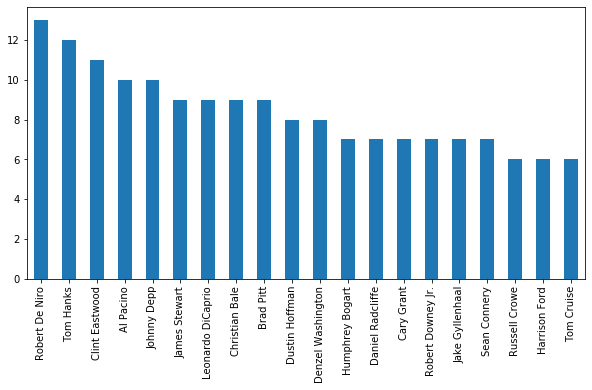

In [581]:
# sort the number of instances of the lead actors 
movies_lead = movies['lead_actor'].value_counts().head(20)
plt.figure(figsize=(10,5))
movies_lead.plot.bar(x=movies_lead[0], y=movies_lead[1]);

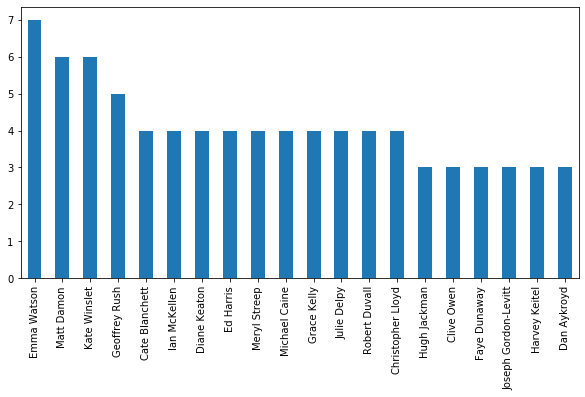

In [582]:
# sort the number of instances of the supporting actors 
movies_spt = movies['supporting_actor'].value_counts().head(20)
plt.figure(figsize=(10,5))
movies_spt.plot.bar(x=movies_spt[0], y=movies_spt[1]);

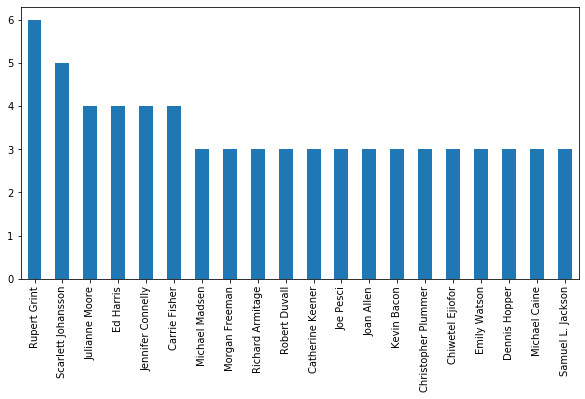

In [583]:
# sort the number of instances of the other actors 
movies_oth = movies['other_actor'].value_counts().head(20)
plt.figure(figsize=(10,5))
movies_oth.plot.bar(x=movies_oth[0], y=movies_oth[1]);

In [616]:
# create new dataframe from actor role and rating
# Weight lead pts x5, suppt x3, other x1 of movie rating.  
# If a movie was amazing the actors popularity should increase proportionately 
movies['lead_pts'] = movies['star_rating']*5  
movies['suppt_pts'] = movies['star_rating']*3
movies['other_pts'] = movies['star_rating']

# create id column for consistent reference  - thought I would need this but used groupby later instead
movies['id'] = movies.index + 1000
movies.head()

,star_rating,title,content_rating,genre,duration,lead_actor,supporting_actor,other_actor,lead_pts,suppt_pts,id,other_pts
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton,46.5,27.9,1000,9.3
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan,46.0,27.6,1001,9.2
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall,45.5,27.3,1002,9.1
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart,45.0,27.0,1003,9.0
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson,44.5,26.7,1004,8.9


In [618]:
# moving id to beginning of table  
id = movies['id']
movies.drop(labels=['id'], axis=1,inplace = True)
movies.insert(0, 'id', id)
movies.head()

,id,star_rating,title,content_rating,genre,duration,lead_actor,supporting_actor,other_actor,lead_pts,suppt_pts,other_pts
0,1000,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton,46.5,27.9,9.3
1,1001,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan,46.0,27.6,9.2
2,1002,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall,45.5,27.3,9.1
3,1003,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart,45.0,27.0,9.0
4,1004,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson,44.5,26.7,8.9


In [636]:
# create new data frame from lead actor and lead pts : other pts
movies_ranked = movies[['lead_actor', 'lead_pts', 'suppt_pts', 'other_pts']]

# group actor points by lead actor.  If they weren't ever a lead it is highly unlikely they would not be the most popular
actor_pts = movies_ranked.groupby('lead_actor').sum()
actor_pts['pop_pts'] = actor_pts['lead_pts'] + actor_pts['suppt_pts'] + actor_pts['other_pts']
actor_pts


,lead_pts,suppt_pts,other_pts,pop_pts
lead_actor,,,,
"""Brian O'Halloran""",77.0,46.2,15.4,138.6
"""Paige O'Hara""",40.5,24.3,8.1,72.9
"""Peter O'Toole""",42.0,25.2,8.4,75.6
"""Ryan O'Neal""",40.5,24.3,8.1,72.9
Aamir Khan,167.5,100.5,33.5,301.5
...,...,...,...,...
Zach Galifianakis,39.0,23.4,7.8,70.2
Zbigniew Zamachowski,38.5,23.1,7.7,69.3
Zero Mostel,38.5,23.1,7.7,69.3


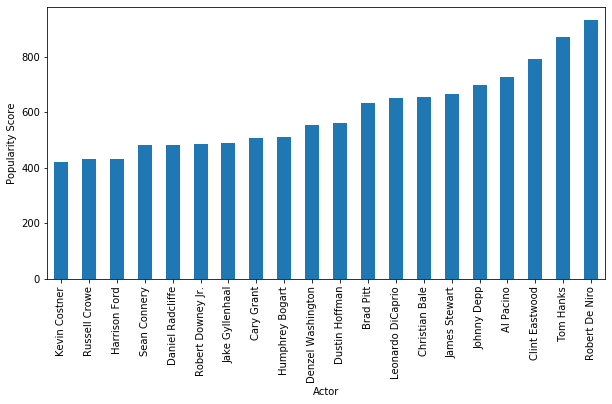

In [637]:
# plot top 20 actors
most_pop = actor_pts['pop_pts'].sort_values().tail(20)
plt.figure(figsize=(10,5))
ax = most_pop.plot.bar(x=most_pop[0], y=most_pop[1]);
ax.set_xlabel("Actor");
ax.set_ylabel("Popularity Score");

# Most popular actor is Robert De Niro 
# but the interesting change happens from 10 - 20 ranked as some supporting actors snuck in